**Importing Libraries**

In [1]:
from tensorflow import keras
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import numpy as np
from keras.models import Sequential
import matplotlib.pyplot as plt

**Importing Data**

In [2]:
cifar=keras.datasets.cifar10

In [3]:
(X_train,y_train),(X_test,y_test)=cifar.load_data()

170500096/170498071 [==============================] - 6s 0us/step


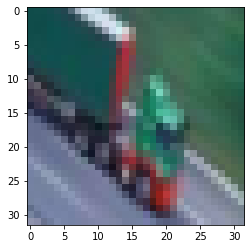

In [4]:
#Checking the image in data
plt.imshow(X_train[50])

In [5]:
#normalizing the data
X_train=X_train/255.0
X_test=X_test/255.0

In [6]:
#getting the number of classes
n=len(np.unique(y_train))

In [7]:
#converting the dependent variable to categorical as there are 10 classes
from keras.utils.np_utils import to_categorical

#converting the dependent variable into categorical because we will use crossentropy as the loss function
y_train=to_categorical(y_train,n)
y_test=to_categorical(y_test,n)

**Building Model**

In [8]:
#building model
model=Sequential()

#Building CNN model
#First Convolutional layer will have input shape of the data
#In rest of the layers it will take the input shape itself depending upon the output of the neurons
model.add(Conv2D(filters=32,kernel_size=3,activation='relu',padding='valid',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=2,strides=2))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu',padding='valid'))
model.add(MaxPooling2D(pool_size=2,strides=2))

#Flattening the feature map to give an input to Dense layer
model.add(Flatten())

#Building ANN 
model.add(Dense(units=32,activation='relu'))
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=128,activation='relu')) 
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=32,activation='relu'))

#Adding the final layer to distinguish the photo into one of the class
model.add(Dense(units=10,activation='softmax'))

In [9]:
#compiling the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
#fitting the model
#saving all the parameters into a variable in order to plot them later
#Parameter validation split has been given to understand how the model will behave with the real world data
answer=model.fit(X_train,y_train,epochs=20,verbose=2,validation_split=0.2,batch_size=64)

Epoch 1/20
625/625 - 26s - loss: 1.7584 - accuracy: 0.3388 - val_loss: 1.4660 - val_accuracy: 0.4545
Epoch 2/20
625/625 - 23s - loss: 1.3748 - accuracy: 0.4972 - val_loss: 1.2825 - val_accuracy: 0.5361
Epoch 3/20
625/625 - 23s - loss: 1.2059 - accuracy: 0.5610 - val_loss: 1.2507 - val_accuracy: 0.5612
Epoch 4/20
625/625 - 24s - loss: 1.1063 - accuracy: 0.5971 - val_loss: 1.1392 - val_accuracy: 0.5962
Epoch 5/20
625/625 - 24s - loss: 1.0351 - accuracy: 0.6275 - val_loss: 1.0419 - val_accuracy: 0.6288
Epoch 6/20
625/625 - 23s - loss: 0.9723 - accuracy: 0.6531 - val_loss: 1.0301 - val_accuracy: 0.6398
Epoch 7/20
625/625 - 24s - loss: 0.9305 - accuracy: 0.6662 - val_loss: 1.0186 - val_accuracy: 0.6408
Epoch 8/20
625/625 - 23s - loss: 0.8962 - accuracy: 0.6805 - val_loss: 1.0149 - val_accuracy: 0.6387
Epoch 9/20
625/625 - 23s - loss: 0.8537 - accuracy: 0.6975 - val_loss: 0.9686 - val_accuracy: 0.6629
Epoch 10/20
625/625 - 23s - loss: 0.8186 - accuracy: 0.7107 - val_loss: 1.0003 - val_accura

In [11]:
#evaluating the model
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 1.0344 - accuracy: 0.6672


[1.0344398021697998, 0.6672000288963318]

In [12]:
#checking the parameters saved in answer variable
answer.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

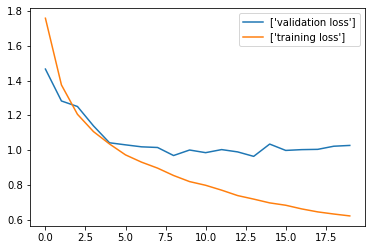

In [13]:
#plotting the graphs between validation and training loss
plt.plot(answer.history['val_loss'],label=['validation loss'])
plt.plot(answer.history['loss'],label=['training loss'])
plt.legend()

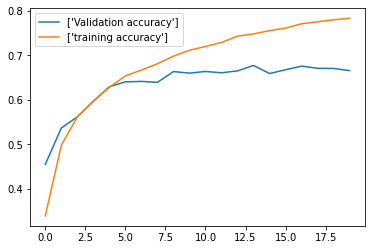

In [14]:
#plotting the graph between validation and training accuracy
plt.plot(answer.history['val_accuracy'],label=['Validation accuracy'])
plt.plot(answer.history['accuracy'],label=['training accuracy'])
plt.legend()

So it can be seen that our model is behaving very well with the training data, but for our test data the accuracy is low and the loss is high. In the second program we will use hyperparameter tuning to select the best parameters and see if the validation accuracy and loss becomes better